In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import tensorflow.keras as keras

import keras.backend as K

import matplotlib.pyplot as plt
import random

import librosa
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
JSON_PATH="drive/MyDrive/project-it290/Extracted_data.json"


In [4]:
def load_data_from_json(json_path):
    
    with open(json_path, "r") as f:
        data=json.load(f)
    
    
    X=data["mfcc"]
    Y=data["labels"]
    print("DATA IS LOADED SUCCESSFULLY")
    return np.array(X), np.array(Y),data["mapping"]

In [5]:
X,Y,music_genres = load_data_from_json(JSON_PATH)

DATA IS LOADED SUCCESSFULLY


In [86]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,shuffle=True, random_state=59,stratify=Y)

In [87]:

print(len(x_train),len(y_train),len(x_test),len(y_test))

3345 3345 1648 1648


In [88]:
X.shape,Y.shape 

((4993, 259, 13, 1), (4993, 1))

In [9]:
X[0]

array([[-2.42435989e+02,  1.02184860e+02, -9.91323471e+00, ...,
        -3.95323563e+00, -2.40564466e+00, -2.38090611e+00],
       [-2.12989746e+02,  1.03544777e+02, -1.08341732e+01, ...,
        -5.81353188e+00,  2.64356732e+00, -2.80662107e+00],
       [-1.95409332e+02,  1.04360657e+02, -1.85501546e-01, ...,
        -1.08171635e+01, -5.88806152e-01, -5.28410530e+00],
       ...,
       [-1.91899704e+02,  1.08769806e+02, -1.85038757e+01, ...,
        -5.09584427e+00,  6.49737644e+00, -4.58149099e+00],
       [-1.49409744e+02,  1.18224014e+02, -9.97815704e+00, ...,
        -6.82235146e+00,  1.23407612e+01, -1.83743787e+00],
       [-1.15706779e+02,  1.15575302e+02,  2.65169716e+00, ...,
        -1.09857616e+01,  1.05130529e+01,  2.66904616e+00]])

In [10]:
Y[0]

0

SIMPLE ANN

In [11]:
ann_model=keras.models.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10,activation="softmax")
])

In [12]:
optimiser=keras.optimizers.Adam(learning_rate=0.0001)
ann_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=optimiser,metrics=['accuracy'])

In [13]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [14]:
ann_history=ann_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,verbose=1)

Epoch 1/100
105/105 [==============================] - 3s 9ms/step - loss: 27.6586 - accuracy: 0.1719 - val_loss: 3.6338 - val_accuracy: 0.2803
Epoch 2/100
105/105 [==============================] - 1s 7ms/step - loss: 8.2948 - accuracy: 0.1967 - val_loss: 2.2685 - val_accuracy: 0.2840
Epoch 3/100
105/105 [==============================] - 1s 7ms/step - loss: 5.1846 - accuracy: 0.1889 - val_loss: 2.1777 - val_accuracy: 0.2518
Epoch 4/100
105/105 [==============================] - 1s 7ms/step - loss: 3.8257 - accuracy: 0.1913 - val_loss: 2.1882 - val_accuracy: 0.2239
Epoch 5/100
105/105 [==============================] - 1s 7ms/step - loss: 3.1597 - accuracy: 0.1815 - val_loss: 2.1987 - val_accuracy: 0.2130
Epoch 6/100
105/105 [==============================] - 1s 8ms/step - loss: 2.9206 - accuracy: 0.1854 - val_loss: 2.1733 - val_accuracy: 0.2166
Epoch 7/100
105/105 [==============================] - 1s 7ms/step - loss: 2.6213 - accuracy: 0.1874 - val_loss: 2.1268 - val_accuracy: 0.233

In [15]:
ann_model.save("ann_model.h5")

In [16]:
def plot_accuracy_error(history):
    fig,axis=plt.subplots(2)
    
    fig.set_size_inches(10,8)
    axis[0].plot(history.history["accuracy"],label="train_accuracy")
    axis[0].plot(history.history["val_accuracy"],label="val_accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc="lower right")
    axis[0].set_title("Accuracy eval")
   
   
   
    axis[1].plot(history.history["loss"],label="train_error")
    axis[1].plot(history.history["val_loss"],label="val_error")
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc="upper right")
    axis[1].set_title("Error eval")
    
    plt.show()    
       

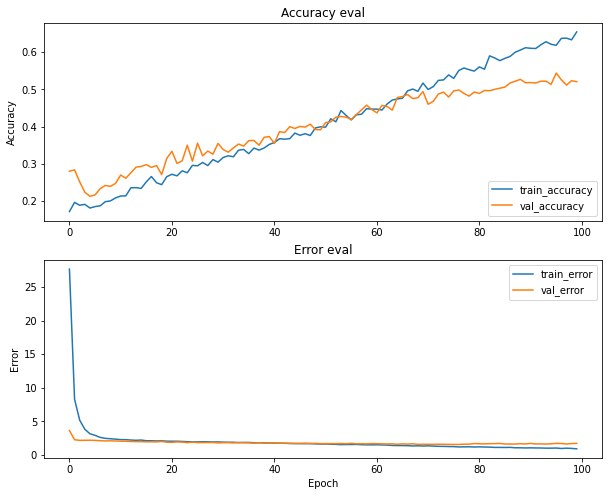

In [17]:
plot_accuracy_error(ann_history)

CREATING CNN MODEL

In [89]:
X=X.reshape(-1,X.shape[1],X.shape[2],1)
Y=Y.reshape(-1,1)

In [90]:
X.shape,Y.shape

((4993, 259, 13, 1), (4993, 1))

In [91]:
cnn_x_train,cnn_x_test_,cnn_y_train,cnn_y_test_ = train_test_split(X,Y,random_state=56,shuffle=True,stratify=Y,test_size=0.25)
cnn_x_val,cnn_x_test,cnn_y_val,cnn_y_test = train_test_split(cnn_x_test_,cnn_y_test_,random_state=89,shuffle=True,stratify=cnn_y_test_,test_size=0.2)

In [92]:
cnn_y_test_.shape,cnn_x_test_.shape

((1249, 1), (1249, 259, 13, 1))

In [93]:
X.shape[0],X.shape[1],X.shape[2] 

(4993, 259, 13)

In [94]:
keras.backend.set_image_data_format('channels_last')


In [95]:
input_shape=(X.shape[1],X.shape[2],1)
input_shape

(259, 13, 1)

In [104]:
def create_model():
    cnn_model=keras.models.Sequential()
    cnn_model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
    cnn_model.add(keras.layers.MaxPooling2D((2,4),strides=(2,2),padding="same",))
    cnn_model.add(keras.layers.BatchNormalization())
      
      
    cnn_model.add(keras.layers.Conv2D(128,(2,2),activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D((2,4),strides=(2,2),padding="same")),
    cnn_model.add(keras.layers.BatchNormalization())
   
    cnn_model.add(keras.layers.Dropout(0.3))
   
    cnn_model.add(keras.layers.Conv2D(64,(2,2),activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D((2,2),strides=(2,2),padding="same")),
    cnn_model.add(keras.layers.BatchNormalization()) 
 
    
    cnn_model.add(keras.layers.Dropout(0.2))
                
    cnn_model.add( keras.layers.Flatten())
    cnn_model.add(keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
    cnn_model.add(keras.layers.Dropout(0.5))
    cnn_model.add(keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
    cnn_model.add(keras.layers.Dropout(0.4))
    cnn_model.add(keras.layers.Dense(10,activation='softmax'))
      
    cnn_optimiser=keras.optimizers.Adam(learning_rate=0.0001)

    cnn_model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer=cnn_optimiser,metrics=['accuracy'])   
    return cnn_model
     

In [105]:
cnn_model=create_model()
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 257, 11, 64)       640       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 129, 6, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 129, 6, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 5, 128)       32896     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 3, 128)       0         
 g2D)                                                            
                                                      

In [106]:
cnn_history=cnn_model.fit(cnn_x_train,cnn_y_train,validation_data=(cnn_x_val,cnn_y_val),verbose=1,epochs=200,batch_size=100)

Epoch 1/200
38/38 [==============================] - 3s 50ms/step - loss: 90.7700 - accuracy: 0.1485 - val_loss: 84.2524 - val_accuracy: 0.1461
Epoch 2/200
38/38 [==============================] - 2s 40ms/step - loss: 78.7822 - accuracy: 0.2270 - val_loss: 72.8870 - val_accuracy: 0.1992
Epoch 3/200
38/38 [==============================] - 2s 40ms/step - loss: 68.0766 - accuracy: 0.2818 - val_loss: 62.7956 - val_accuracy: 0.3063
Epoch 4/200
38/38 [==============================] - 2s 40ms/step - loss: 58.5842 - accuracy: 0.3074 - val_loss: 53.8765 - val_accuracy: 0.3814
Epoch 5/200
38/38 [==============================] - 1s 39ms/step - loss: 50.1485 - accuracy: 0.3448 - val_loss: 46.0483 - val_accuracy: 0.4464
Epoch 6/200
38/38 [==============================] - 2s 40ms/step - loss: 42.8342 - accuracy: 0.3670 - val_loss: 39.2381 - val_accuracy: 0.4775
Epoch 7/200
38/38 [==============================] - 2s 40ms/step - loss: 36.4464 - accuracy: 0.4017 - val_loss: 33.3668 - val_accuracy:

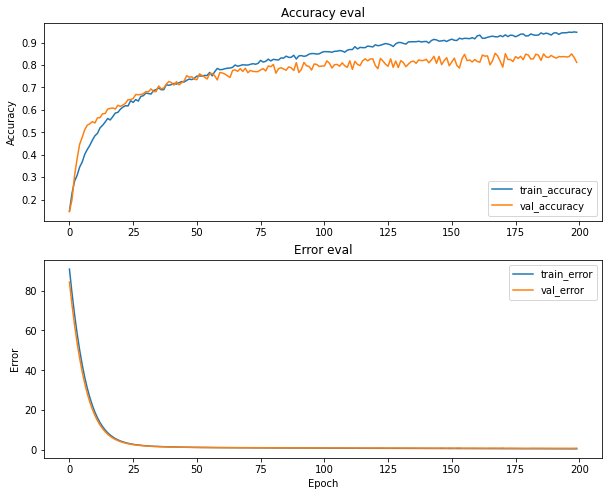

In [112]:
plot_accuracy_error(cnn_history)

In [113]:
cnn_model.save("cnn_model.h5")

In [114]:
X_predi=cnn_x_test[20]
Y_predi=cnn_y_test[20]
X_predi=X_predi.reshape(1,X_predi.shape[0],X_predi.shape[1],1)
X_predi.shape

(1, 259, 13, 1)

In [115]:
model=keras.models.load_model('cnn_model.h5')

In [116]:
prediction=model.predict(X_predi)

In [117]:
prediction.shape,Y_predi.shape

((1, 10), (1,))

In [118]:
predicted_index=np.argmax(prediction,axis=1)
print(prediction[0][predicted_index],predicted_index)

[0.41373995] [9]


In [119]:
Y_predi[0]

2

In [126]:
correct=0
wrong=0
for _ in range(30):
  a=random.randint(0,len(cnn_x_test)-1)
  sample=cnn_x_test[a].reshape(1,cnn_x_test.shape[1],cnn_x_test.shape[2],1)
  print("\nindex :{}\nreal Genre : {}".format(a,music_genres[cnn_y_test[a][0]]))
  prediction=model.predict(sample)
  index=np.argmax(prediction,axis=1)
  print("predicted Genre :{}".format(music_genres[index[0]]))
  if cnn_y_test[a][0]==index[0]:
    correct+=1
  else:
    wrong+=1


index :173
real Genre : reggae
predicted Genre :reggae

index :195
real Genre : pop
predicted Genre :pop

index :72
real Genre : pop
predicted Genre :country

index :174
real Genre : jazz
predicted Genre :jazz

index :51
real Genre : country
predicted Genre :country

index :67
real Genre : jazz
predicted Genre :country

index :229
real Genre : jazz
predicted Genre :hiphop

index :205
real Genre : rock
predicted Genre :rock

index :211
real Genre : reggae
predicted Genre :metal

index :163
real Genre : blues
predicted Genre :blues

index :213
real Genre : rock
predicted Genre :rock

index :147
real Genre : hiphop
predicted Genre :hiphop

index :159
real Genre : hiphop
predicted Genre :hiphop

index :241
real Genre : hiphop
predicted Genre :hiphop

index :179
real Genre : disco
predicted Genre :disco

index :79
real Genre : blues
predicted Genre :blues

index :62
real Genre : classical
predicted Genre :classical

index :127
real Genre : blues
predicted Genre :blues

index :225
real Genr

In [127]:
correct,wrong

(24, 6)

In [128]:
result=model.evaluate(cnn_x_test,cnn_y_test)

8/8 [==============================] - 0s 10ms/step - loss: 0.8299 - accuracy: 0.8200


In [123]:
result

[0.829929769039154, 0.8199999928474426]